In [3]:
# first to run everytime
%config InlineBackend.figure_format = 'retina'
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from astropy.io import fits
import astropy.constants as const
c = const.c.cgs.value

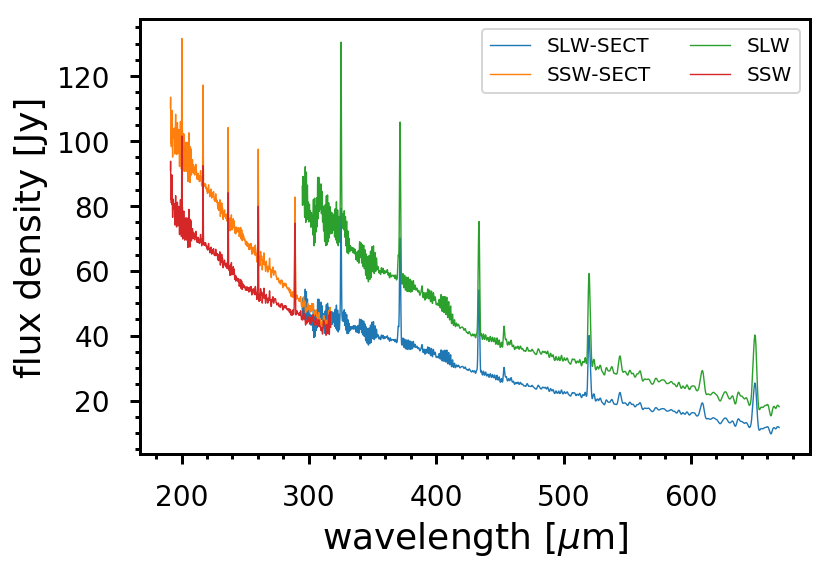

In [16]:
l1251b_sect = '/Users/yaolun/test/L1251B_PointSourceExtraction_SECT.fits'
l1251b = '/Users/yaolun/test/L1251B_PointSourceExtraction.fits'
fig = plt.figure()
ax = fig.add_subplot(111)

for f in [l1251b_sect, l1251b]:
    hdu = fits.open(f)
    
    if 'SECT' in f:
        msg = '-SECT'
    else:
        msg = ''
    
    pix_slw = np.pi/4.*34**2
    pix_ssw = np.pi/4.*19**2

    wl_slw = c/1e5/hdu[2].data.field(0)[3:-3]
    flux_slw = hdu[2].data.field(1)[3:-3]
    wl_ssw = c/1e5/hdu[3].data.field(0)[3:-3]
    flux_ssw = hdu[3].data.field(1)[3:-3]
    
    ax.plot(wl_slw, flux_slw, label='SLW'+msg, linewidth=0.7)
    ax.plot(wl_ssw, flux_ssw, label='SSW'+msg, linewidth=0.7)
ax.legend(loc='best', ncol=2)

ax.set_xlabel('wavelength [$\mu$m]', fontsize=18)
ax.set_ylabel('flux density [Jy]', fontsize=18)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=14,width=1.5,which='major',pad=10,length=5)
ax.tick_params('both',labelsize=14,width=1.5,which='minor',pad=10,length=2.5)

fig.savefig('/Users/yaolun/test/L1251B_comparsion.pdf', format='pdf', dpi=300, bbox_inches='tight')